In [ ]:
import pandas as pd
import numpy as np
import datetime
from itertools import cycle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
clusterID = np.load('/content/drive/MyDrive/Colab Notebooks/clusterID_genotype.npy')
weather = np.load('/content/drive/MyDrive/Colab Notebooks/inputs_weather_train.npy')
traits = np.load('/content/drive/MyDrive/Colab Notebooks/inputs_others_train.npy')
train_yield = np.load('/content/drive/MyDrive/Colab Notebooks/yield_train.npy')

## Organizing Weather Data

In [ ]:
perf_records, days, variables = weather.shape

In [ ]:
out_arr = np.column_stack((np.repeat(np.arange(perf_records),days),weather.reshape(perf_records*days,-1)))
out_df = pd.DataFrame(out_arr)

In [ ]:
# Building a data frame based on input weather data, with columns named for the variables
out_df = pd.DataFrame(out_arr, columns=['Performance Record','ADNI', 'AP', 'ARH', 'MDNI', 'MaxSur', 'MinSur', 'AvgSur'])

In [ ]:
out_df['Performance Record'] = pd.to_numeric(out_df['Performance Record']).astype(int)

In [ ]:
## Counts all of the days in Performance Record
out_df['Day'] = out_df.groupby('Performance Record').cumcount() + 1

In [ ]:
out_df['Julian_date'] = out_df.groupby('Performance Record').cumcount() + 91

In [ ]:
def jdtodatestd (jdate):
    fmt = '%j'
    datestd = datetime.datetime.strptime(jdate, fmt).date()
    return(datestd)

In [ ]:
subset = out_df[out_df['Performance Record'] == 0]

In [ ]:
date_list = []
for i, row in subset.iterrows():
    julian = int(row['Julian_date'])
    date = datetime.datetime.strptime(f'{julian}', '%j').date()
    clean_date = date.strftime("%m-%d")
    date_list.append(clean_date)

In [ ]:
date_cycle = cycle(date_list)
out_df['date'] = [next(date_cycle) for cycle in range(len(out_df))]

In [ ]:
out_df

,Performance Record,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur,Day,Julian_date,date
0,0,169.88,0.00,50.50,814.0,57.3,32.3,43.23,1,91,04-01
1,0,12.54,0.01,84.75,93.0,51.3,36.6,43.85,2,92,04-02
2,0,321.38,0.00,65.08,986.0,56.7,28.9,42.07,3,93,04-03
3,0,153.67,0.00,63.50,777.0,67.7,43.9,52.45,4,94,04-04
4,0,6.75,0.01,71.00,118.0,63.8,38.8,47.25,5,95,04-05
...,...,...,...,...,...,...,...,...,...,...,...
19907987,93027,48.92,0.00,83.63,470.0,76.6,57.9,64.23,210,300,10-27
19907988,93027,120.21,0.00,89.42,618.0,75.8,62.6,67.39,211,301,10-28
19907989,93027,2.00,0.00,90.58,24.0,72.2,63.3,66.63,212,302,10-29
19907990,93027,258.83,0.00,82.88,884.0,80.8,63.3,68.97,213,303,10-30


# Creating annual averages of weather data

In [ ]:
yearly_df = pd.DataFrame(index = range(0, 93027), columns = out_df.columns.values.tolist())
yearly_df = yearly_df.drop(columns=['Performance Record', 'Day', 'Julian_date', 'date'])
yearly_df.reset_index().rename(columns={'index':'Performance Record'})
input_df = out_df.drop(columns=['Day', 'Julian_date', 'date'])
input_dict = dict(tuple(input_df.groupby('Performance Record')))
for pf in range(0, 93028):
  current_df = input_dict[pf]
  for i in current_df.columns.values.tolist():
    new_val = current_df[i].mean()
    yearly_df.at[pf, i] = new_val
yearly_df = yearly_df.drop(columns=['Performance Record'])
print(yearly_df)

          ADNI          AP      ARH     MDNI   MaxSur   MinSur   AvgSur
0      219.414  0.00551402  71.4315  718.664  76.1472  56.3561  65.1359
1      208.647  0.00705607  77.0154   709.14   79.164  59.6818  68.4279
2      233.999  0.00439252   71.553  761.977  81.7257  56.2537  67.8292
3      229.848  0.00640187  72.4757  749.701  75.4061  55.7093  64.4512
4      243.311  0.00434579  61.5843  761.682  78.5864  55.8991  65.7533
...        ...         ...      ...      ...      ...      ...      ...
93023   241.07  0.00691589  71.2502  801.486  85.0949  63.3285  72.9051
93024  238.003  0.00528037  67.4438  768.537  79.2593  57.9402  67.3283
93025  198.916  0.00570093  71.2126  652.117  73.1537  53.9187  62.4799
93026  219.869  0.00626168  70.1836  755.444  87.5953  65.6701  75.1928
93027  215.702       0.005  65.6806  721.229  84.3416  62.3304  71.9704

[93028 rows x 7 columns]


In [ ]:
weekly_df = pd.DataFrame(index = range(0, 651196), columns = out_df.columns.values.tolist())

## Other Trait Data

In [ ]:
# Building a data frame based on input data, with columns named for the variables
trait_df = pd.DataFrame(traits, columns=['Maturity Group', 'Genotype ID', 'State', 'Year', 'Location'])

In [ ]:
trait_df['Year'] = pd.to_numeric(trait_df['Year'])
trait_df['Genotype ID'] = pd.to_numeric(trait_df['Genotype ID'])
trait_df['Year'] = trait_df['Year'].astype(int)
trait_df['Genotype ID'] = trait_df['Genotype ID'].astype(int)

## Yield Data

In [ ]:
yield_df = pd.DataFrame(train_yield)

In [ ]:
yield_df.rename(columns = {0:'Yield'}, inplace = True)

In [ ]:
## Merging the two

trait_df['Yield'] = yield_df['Yield']

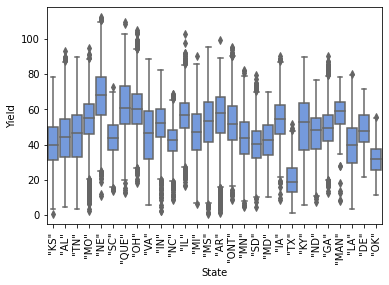

In [ ]:
## Comparing total yield for each state across all years

sns.boxplot(data = trait_df, x = 'State', y = 'Yield', color = 'cornflowerblue')
plt.xticks(rotation=90);

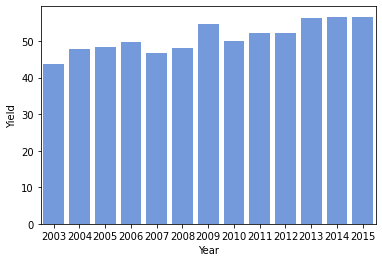

In [ ]:
## Comparing average yield for each year

sns.barplot(data = trait_df.groupby('Year').mean().reset_index(), x = 'Year', y = 'Yield', color = 'cornflowerblue')

# Adding Cluster ID to trait data

In [ ]:
print(len(clusterID))

5839


In [ ]:
cluster_dict = {}
for i in range(1, 5839):
  array_index = i-1
  cID = clusterID[i-1]
  cluster_dict.update({i:cID})

In [ ]:
cluster_list = []
for i in trait_df.index:
  genotype = trait_df.iloc[i]['Genotype ID']
  cluster = cluster_dict.get(genotype)
  cluster_list.append(cluster)
trait_df['Cluster'] = cluster_list

# Condensed trait data frame

In [ ]:
trait_df['Maturity Group'] = pd.to_numeric(trait_df['Maturity Group'])
trait_df['Maturity Group'] = trait_df['Maturity Group'].astype(int)


In [ ]:
del trait_df['Location']
del trait_df['Genotype ID']

In [ ]:
trait_df.reset_index().rename(columns={'index':'Performance Record'})

,Performance Record,Maturity Group,State,Year,Yield,Cluster
0,0,3,"""KS""",2009,39.0,6.0
1,1,6,"""AL""",2013,54.2,6.0
2,2,4,"""TN""",2015,73.6,3.0
3,3,3,"""MO""",2014,70.9,9.0
4,4,3,"""NE""",2008,82.1,12.0
...,...,...,...,...,...,...
93023,93023,8,"""AL""",2014,22.2,0.0
93024,93024,4,"""IL""",2008,68.6,9.0
93025,93025,2,"""IN""",2006,65.6,6.0
93026,93026,5,"""LA""",2008,43.5,0.0


# Maturity Group Testing

In [ ]:
trait_df

,Maturity Group,State,Year,Yield,Cluster
0,3,"""KS""",2009,39.0,6.0
1,6,"""AL""",2013,54.2,6.0
2,4,"""TN""",2015,73.6,3.0
3,3,"""MO""",2014,70.9,9.0
4,3,"""NE""",2008,82.1,12.0
...,...,...,...,...,...
93023,8,"""AL""",2014,22.2,0.0
93024,4,"""IL""",2008,68.6,9.0
93025,2,"""IN""",2006,65.6,6.0
93026,5,"""LA""",2008,43.5,0.0


In [ ]:
states_dict = {}
for i in trait_df.index:
  state = trait_df.iloc[i]['State']
  new_loc = trait_df.iloc[i]['Location']
  locations = states_dict.get(state, [])
  locations.append(new_loc)
  states_dict.update({state:locations})


In [ ]:
mg_dict = {}
for i in trait_df.index:
  state = trait_df.iloc[i]['State']
  new_mg = trait_df.iloc[i]['Maturity Group']
  mgs = mg_dict.get(state, [])
  mgs.append(new_mg)
  mg_dict.update({state:mgs})
  

In [ ]:
stmg_df = pd.DataFrame()
for key in mg_dict.keys():
  states_mgs = mg_dict.get(key)
  counts = []
  mg_values = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  for mg in mg_values:
    new_count = states_mgs.count(mg)
    counts.append(new_count)
  stmg_df[key]=pd.Series(counts,index=mg_values)


In [ ]:
# Data frame showing counts of maturity group by state/province
stmg_df

,"""KS""","""AL""","""TN""","""MO""","""NE""","""SC""","""QUE""","""OH""","""VA""","""IN""","""NC""","""IL""","""MI""","""MS""","""AR""","""ONT""","""MN""","""SD""","""MD""","""IA""","""TX""","""KY""","""ND""","""GA""","""MAN""","""LA""","""DE""","""OK"""
-1,0,0,0,0,0,0,498,0,0,0,0,0,0,0,64,725,1031,0,0,0,0,0,557,0,126,0,0,0
0,0,0,0,35,287,0,908,0,0,0,0,0,161,0,90,1772,1810,1299,0,0,0,0,855,0,0,0,0,0
1,0,0,0,29,2120,0,777,0,0,1259,0,0,1142,0,74,745,1655,1182,0,1114,0,0,0,0,0,0,0,0
2,0,0,0,27,3481,0,0,1376,0,1753,0,1479,1643,0,144,1484,768,1478,0,1570,0,0,0,0,0,0,0,0
3,1839,0,0,1569,3299,0,0,2126,0,1848,0,1373,0,0,166,0,0,0,113,1647,0,0,0,0,0,0,33,0
4,2298,0,2029,2501,31,0,0,268,1179,851,558,2237,0,1024,1735,0,0,0,928,0,268,725,0,0,0,217,170,434
5,1629,324,1419,1223,0,0,0,0,1523,0,921,489,0,1071,1681,0,0,0,530,0,239,248,0,31,0,389,100,408
6,0,1086,0,0,0,722,0,0,464,0,736,0,0,545,1076,0,0,0,0,0,51,0,0,805,0,265,0,246
7,0,740,0,0,0,740,0,0,0,0,956,0,0,111,0,0,0,0,0,0,0,0,0,1601,0,197,0,0
8,0,830,0,0,0,734,0,0,0,0,576,0,0,0,0,0,0,0,0,0,0,0,0,1338,0,0,0,0


In [ ]:
# focusing on the state of Arkansas, creating a data frame of maturity groups and yields for all "AR" performance records
AR_df = pd.DataFrame()
AR_mgs = []
AR_yields = []
for i in trait_df.index:
  state = trait_df.iloc[i]['State']
  if state == '"AR"':
    new_mg = trait_df.iloc[i]['Maturity Group']
    AR_mgs.append(new_mg)
    new_yield = trait_df.iloc[i]['Yield']
    AR_yields.append(new_yield)
AR_df['Maturity Group']=pd.Series(AR_mgs)
AR_df['Yield']=pd.Series(AR_yields)
AR_df

,Maturity Group,Yield
0,-1,44.4
1,5,59.3
2,4,11.1
3,6,62.2
4,4,47.4
...,...,...
5025,4,45.6
5026,4,47.1
5027,6,42.0
5028,4,60.7


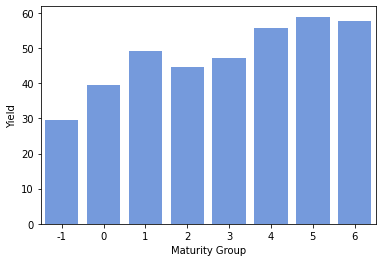

In [ ]:
# Analyzing the relationship between Maturity Group and Yield 

sns.barplot(data = AR_df.groupby('Maturity Group').mean().reset_index(), x = 'Maturity Group', y = 'Yield', color = 'cornflowerblue')

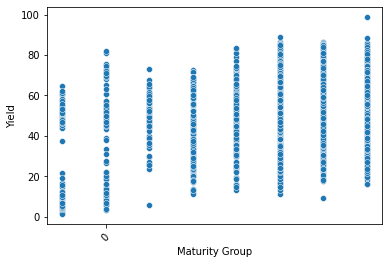

In [ ]:
ax = sns.scatterplot(data = AR_df, x = 'Maturity Group', y = 'Yield')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation=45);

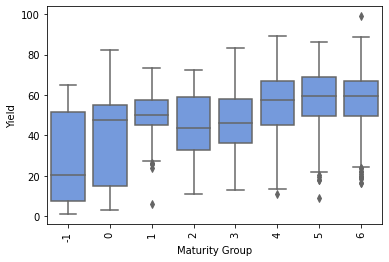

In [ ]:
sns.boxplot(data = AR_df, x = 'Maturity Group', y = 'Yield', color = 'cornflowerblue')
plt.xticks(rotation=90);

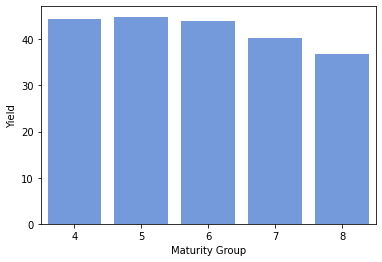

In [ ]:
NC_df = pd.DataFrame()
NC_mgs = []
NC_yields = []
for i in trait_df.index:
  state = trait_df.iloc[i]['State']
  if state == '"NC"':
    new_mg = trait_df.iloc[i]['Maturity Group']
    NC_mgs.append(new_mg)
    new_yield = trait_df.iloc[i]['Yield']
    NC_yields.append(new_yield)
NC_df['Maturity Group']=pd.Series(NC_mgs)
NC_df['Yield']=pd.Series(NC_yields)
NC_df
sns.barplot(data = NC_df.groupby('Maturity Group').mean().reset_index(), x = 'Maturity Group', y = 'Yield', color = 'cornflowerblue')